<a href="https://colab.research.google.com/github/Rushikesh01999/Machine-Learning/blob/master/MNIST_dataset_Handwritten_digit_recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import tensorflow as tf
import keras
from tensorflow.keras.callbacks import TensorBoard
import time
import numpy as np
import matplotlib.pyplot as plt
import cv2

Using TensorFlow backend.


In [ ]:
mnist = tf.keras.datasets.mnist #28*28 image of handwritten of 0-9 
(x_train, y_train),(x_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
print("Training Data Shape is {}".format(x_train.shape))
print("Training Labels Shape is {}".format(y_train.shape))
print("Testing Data Shape is {}".format(x_test.shape))
print("Testing Labels Shape is {}".format(y_test.shape))

Training Data Shape is (60000, 28, 28)
Training Labels Shape is (60000,)
Testing Data Shape is (10000, 28, 28)
Testing Labels Shape is (10000,)


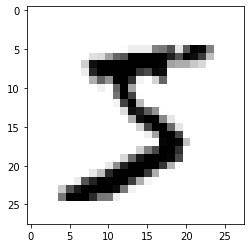

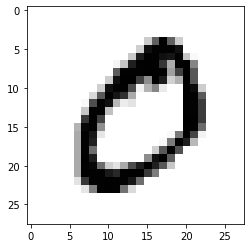

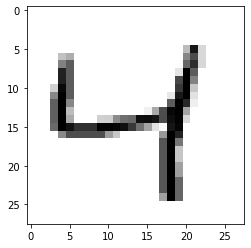

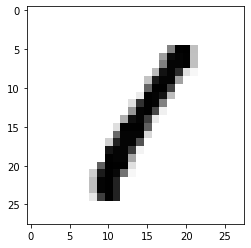

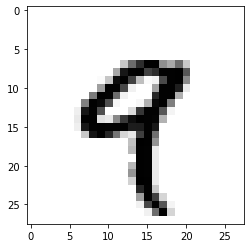

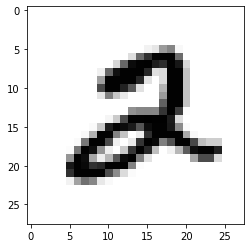

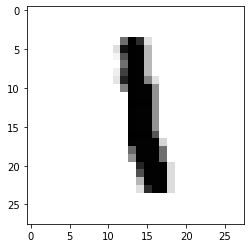

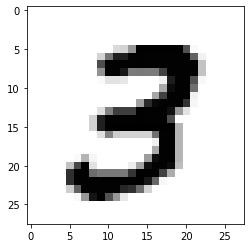

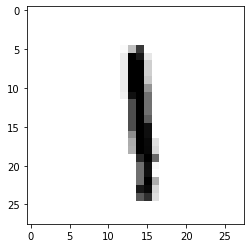

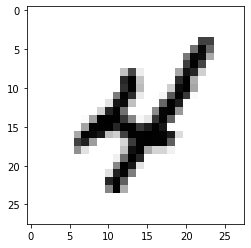

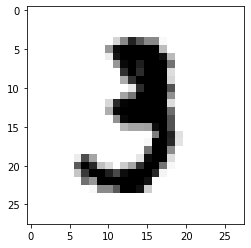

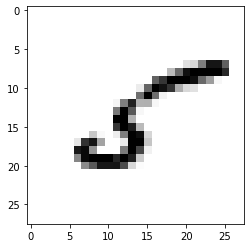

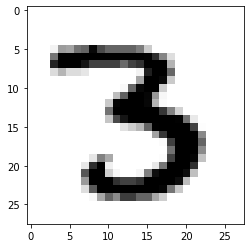

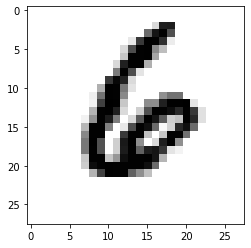

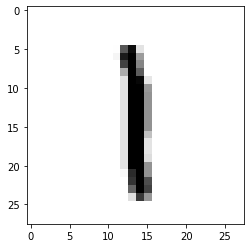

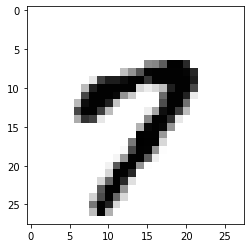

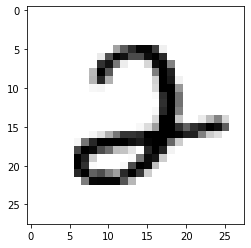

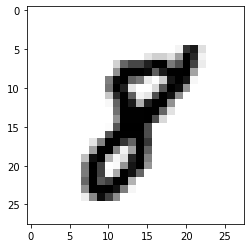

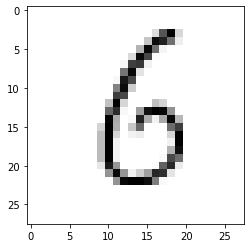

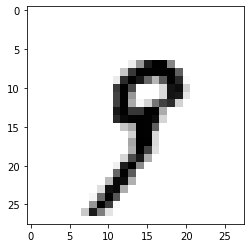

In [ ]:

for i in range(0,20):
  plt.imshow(x_train[i], cmap = plt.cm.binary)
  plt.show()

In [ ]:
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test,axis = 1)

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten()) 
model.add(tf.keras.layers.Dense(784,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(784,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax)) # softmax for probability distribution
model.compile(optimizer = "adam" , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'] )
model.fit(x_train,y_train,epochs = 3 )
predictions = model.predict(x_test)

Epoch 1/3
1875/1875 [==============================] - 20s 10ms/step - loss: 0.1913 - accuracy: 0.9416
Epoch 2/3
1875/1875 [==============================] - 20s 10ms/step - loss: 0.0798 - accuracy: 0.9753
Epoch 3/3
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0538 - accuracy: 0.9834


In [ ]:
print("Probability distribution for a multi-class classification")
predictions[0]

Probability distribution for a multi-class classification


array([7.9257291e-08, 3.1636784e-08, 1.6062044e-05, 3.3701858e-06,
       4.6314805e-09, 6.8653341e-09, 9.2349063e-15, 9.9997175e-01,
       8.3194585e-08, 8.7825838e-06], dtype=float32)

7


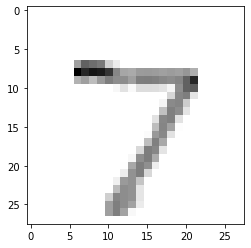

In [ ]:
print(np.argmax(predictions[0]))
plt.imshow(x_test[0], cmap = plt.cm.binary)
plt.show()


In [ ]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.0859 - accuracy: 0.9714
0.08587899804115295 0.9714000225067139


7


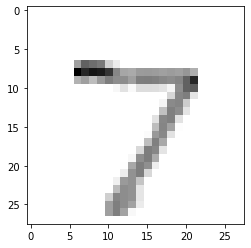

In [ ]:

predictions = model.predict(x_test)
print(np.argmax(predictions[0]))
plt.imshow(x_test[0], cmap = plt.cm.binary)
plt.show()

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          multiple                  0         
_________________________________________________________________
dense_6 (Dense)              multiple                  615440    
_________________________________________________________________
dense_7 (Dense)              multiple                  615440    
_________________________________________________________________
dense_8 (Dense)              multiple                  7850      
Total params: 1,238,730
Trainable params: 1,238,730
Non-trainable params: 0
_________________________________________________________________


<IPython.core.display.Javascript object>

Saved to photo.jpg


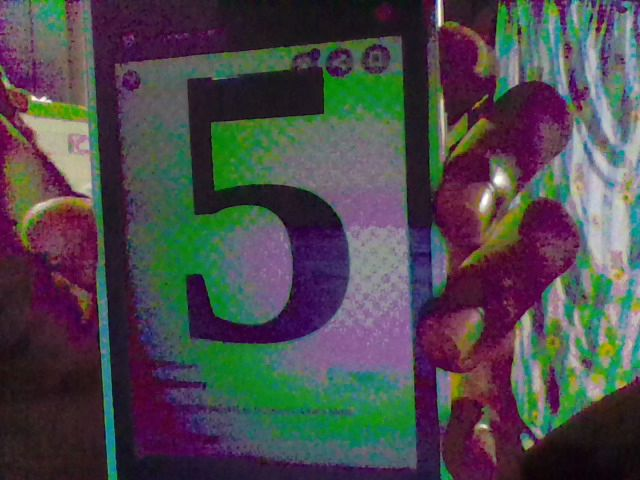

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

307200


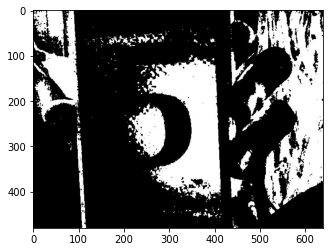

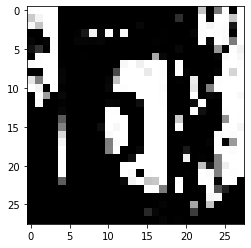

ValueError: ignored

In [ ]:
from PIL import Image
user_test = filename
col = Image.open(user_test)
gray = col.convert('L')
bw = gray.point(lambda x: 0 if x<100 else 255, '1')
bw.save("bw_image.jpg")
bw
img_array = cv2.imread("bw_image.jpg", cv2.IMREAD_GRAYSCALE)
img_array = cv2.bitwise_not(img_array)
print(img_array.size)
plt.imshow(img_array, cmap = plt.cm.binary)
plt.show()
img_size = 28
new_array = cv2.resize(img_array, (img_size,img_size))
plt.imshow(new_array, cmap = plt.cm.binary)
plt.show()
user_test = tf.keras.utils.normalize(new_array, axis = 1)

predicted = model.predict(user_test)
a = predicted[0][0]
for i in range(0,10):
  b = predicted[0][i]
  print("Probability Distribution for",i,b)

print("The Predicted Value is",np.argmax(predicted[0]))